# STA 141B: Homework 6
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Dandi

Last Name: Peng

Student ID: 915553480

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Web scraping the Aggie

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [1]:
import requests
import requests_cache

from bs4 import BeautifulSoup
import json
import pandas as pd
from http import cookiejar
from time import sleep
import random
from lxml import html
import re

requests_cache.install_cache('aggie_news_cache')

In [2]:
def find_articles(url, page = 1):
    '''
    '''
    
    # get the page 1 
    website = requests.get(url)
    ctgry_bs = BeautifulSoup(website.content,"lxml")
    ctgry_articles = [i.find("a")["href"] for i in ctgry_bs.find_all('h2', {'class' : 'entry-title'})]
    
    # get new pages link when the number of page is not 1
    if page != 1:
        new_pages_link = ctgry_bs.find('a',{'class':'next page-numbers'})['href']
        for i in range(page-1):
            new_page = requests.get(new_pages_link)
            ctgry_bs = BeautifulSoup(new_page.content,"lxml")
            ctgry_articles= ctgry_articles+[i.find("a")["href"] for i in ctgry_bs.find_all('h2', {'class' : 'entry-title'})]
            new_pages_link = ctgry_bs.find('a',{'class':'next page-numbers'})['href']
            
    print('The number of articles I found is',len(ctgry_articles))
    
    return ctgry_articles

In [3]:
url = 'https://theaggie.org/campus/'
find_articles(url, page = 4)

The number of articles I found is 60


['https://theaggie.org/2018/03/16/uc-regents-approve-nonresident-tuition-hike/',
 'https://theaggie.org/2018/03/15/second-sds-administration-meeting-held-two-administrators-present/',
 'https://theaggie.org/2018/03/15/police-accountability-board-holds-winter-quarter-public-meeting-with-low-turnout/',
 'https://theaggie.org/2018/03/15/students-for-justice-in-palestine-hold-protest-construct-apartheid-wall/',
 'https://theaggie.org/2018/03/13/last-week-in-senate-25/',
 'https://theaggie.org/2018/03/12/uc-regents-will-vote-on-nonresident-tuition-hike-on-wednesday/',
 'https://theaggie.org/2018/03/12/cheating-allegations-in-soc-46a/',
 'https://theaggie.org/2018/03/12/chancellor-creates-three-task-forces-to-improve-student-life/',
 'https://theaggie.org/2018/03/06/duke-law-professor-presents-lecture-voting-rights-law/',
 'https://theaggie.org/2018/03/05/last-week-senate-25-8/',
 'https://theaggie.org/2018/03/05/icc-warns-students-wary-suspicious-job-offering/',
 'https://theaggie.org/2018/

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

* If you are having trouble working with unicode characters see [the python 3 documentation](https://docs.python.org/3/howto/unicode.html).

In [4]:
def article(url):
    info_dic = {'url':url}

    article_rq = requests.get(url)
    article_bs = BeautifulSoup(article_rq.content,"lxml")
    
    title = article_bs.find('h1', {'class':'entry-title'}).text
    info_dic.update({'title':title})
    
    # find the text and author
    # use regex since sometimes there is typo at the 'Written by' part
    text = ''
    all_content = article_bs.find('div',{'itemprop': 'articleBody'})
    all_content_p = all_content.find_all('p')
    author = 'Unknown'
    for content in all_content_p:
        if re.search('^W\w{6}\s\w{2}:.*', content.text) != None:
            author = content.text
        else:
            text = text + content.text
    
    print(author)
    info_dic.update({'text':text})
    info_dic.update({'author':author})
    
    return info_dic

In [5]:
article('https://theaggie.org/2018/03/16/uc-regents-approve-nonresident-tuition-hike/')

Written by: Hannah Holzer — campus@theaggie.org


{'author': 'Written by: Hannah Holzer — campus@theaggie.org',
 'text': 'Nonresident UC students will pay $978 more, effective fall of 2018The UC Regents have just approved a 3.5 percent tuition hike for nonresident students. This tuition hike, an increase in tuition of $978 per nonresident student, will be effective in the fall of 2018. The tuition hike was approved with a 12-3 vote after UC President Janet Napolitano urged Regents to approve the increase. According to the LA Times, the Regents will rescind the decision if the California legislature ends up increasing funding to the UC.The impact of the 3.5 percent increase in nonresident tuition will have a $5 million impact on UC Davis. The tuition hike will amount to an overall $34.8 million for the UC.“We all know that we have to pass this,” said regent Hadi Makarechian at the Finance and Capital Strategies Committee meeting on March 14. “All I’m saying is that we really have to organize all the students so they understand it’s not

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [6]:
url = 'https://theaggie.org/campus/'
campus_link = find_articles(url, page = 4)

The number of articles I found is 60


In [7]:
url = 'https://theaggie.org/city/'
city_link = find_articles(url, page = 4)

The number of articles I found is 60


In [8]:
all_article_df = pd.DataFrame(columns = ['url', 'title', 'text', 'author'])

for url in campus_link:
    print(url)
    article_info = article(url)
    article_info.update({'category': 'Campus News'})
    article_df = pd.DataFrame.from_dict(article_info, orient='index')
    article_df = article_df.reset_index().transpose()
    article_df = article_df.rename(columns = article_df.iloc[0]).drop(article_df.index[0]).reset_index(drop = True)
    all_article_df = pd.concat([all_article_df,article_df], axis=0)
    
for url in city_link:
    print(url)
    article_info = article(url)
    article_info.update({'category': 'City News'})
    article_df = pd.DataFrame.from_dict(article_info, orient='index')
    article_df = article_df.reset_index().transpose()
    article_df = article_df.rename(columns = article_df.iloc[0]).drop(article_df.index[0]).reset_index(drop = True)
    all_article_df = pd.concat([all_article_df,article_df], axis=0)

https://theaggie.org/2018/03/16/uc-regents-approve-nonresident-tuition-hike/
Written by: Hannah Holzer — campus@theaggie.org
https://theaggie.org/2018/03/15/second-sds-administration-meeting-held-two-administrators-present/
Written by: Aaron Liss — campus@theaggie.org
https://theaggie.org/2018/03/15/police-accountability-board-holds-winter-quarter-public-meeting-with-low-turnout/
Written by: Aaron Liss — campus@theaggie.org
https://theaggie.org/2018/03/15/students-for-justice-in-palestine-hold-protest-construct-apartheid-wall/
Written by: Clara Zhao –– campus@theaggie.org
https://theaggie.org/2018/03/13/last-week-in-senate-25/
Written by: George Liao — campus@theaggie.org
https://theaggie.org/2018/03/12/uc-regents-will-vote-on-nonresident-tuition-hike-on-wednesday/
Written by: Hannah Holzer — campus@theaggie.org
https://theaggie.org/2018/03/12/cheating-allegations-in-soc-46a/
Written by: Sabrina Habchi — campus@theaggie.org
https://theaggie.org/2018/03/12/chancellor-creates-three-task-

Unknown
https://theaggie.org/2018/03/13/davis-students-pedal-for-polar-bears/
Written by: Genevieve Murphy-Skilling — city@theaggie.org
https://theaggie.org/2018/03/12/sixth-annual-climate-conference-growing-resilient-forests/
Written by: Rabiya Oberoi — city@theaggie.org
https://theaggie.org/2018/03/11/new-committee-members-to-join-yolo-county/
Written by: Stella Tran — city@theaggie.org
https://theaggie.org/2018/03/11/yolo-rainbow-families-hosts-workshops-about-gender-diverse-children/
Written by: Hannan Waliullah — city@theaggie.org
https://theaggie.org/2018/03/08/uc-davis-student-fighting-for-new-city-flag/
Written by: Dylan Svoboda — city@theaggie.org
https://theaggie.org/2018/03/06/soroptimist-international-greater-davis-presents-college-scholarships-women/
Written by: Hannan Waliullah — city@theaggie.org
https://theaggie.org/2018/03/06/police-logs-43/
Unknown
https://theaggie.org/2018/03/06/grant-awarded-yolo-hospice/
Written by: Rabiya Oberoi — city@theaggie.org
https://theaggi

In [9]:
all_article_df = all_article_df.reset_index(drop=True)
print('The number of rows is',len(all_article_df.iloc[:,0]))
all_article_df.head()

The number of rows is 120


,author,category,text,title,url
0,Written by: Hannah Holzer — campus@theaggie.org,Campus News,"Nonresident UC students will pay $978 more, ef...",UC Regents approve nonresident tuition hike,https://theaggie.org/2018/03/16/uc-regents-app...
1,Written by: Aaron Liss — campus@theaggie.org,Campus News,Discussion centered around student transportat...,Second SDS administration meeting held; two ad...,https://theaggie.org/2018/03/15/second-sds-adm...
2,Written by: Aaron Liss — campus@theaggie.org,Campus News,PAB investigated five cases out of 18 reported...,Police Accountability Board holds Winter Quart...,https://theaggie.org/2018/03/15/police-account...
3,Written by: Clara Zhao –– campus@theaggie.org,Campus News,"Protesters say wall between Israel, Palestine ...",Students for Justice in Palestine hold protest...,https://theaggie.org/2018/03/15/students-for-j...
4,Written by: George Liao — campus@theaggie.org,Campus News,Funding for Student Advocates for Mental Healt...,Last week in Senate,https://theaggie.org/2018/03/13/last-week-in-s...


In [10]:
all_article_df.loc[all_article_df['author'] == 'Unknown']

,author,category,text,title,url
61,Unknown,City News,Who is Monica?Feb. 19“Heard only for last 10 m...,Police Logs,https://theaggie.org/2018/03/13/police-logs-44/
68,Unknown,City News,Keep your own trashFeb. 13“Reporting party bel...,Police Logs,https://theaggie.org/2018/03/06/police-logs-43/
74,Unknown,City News,Why did the dog cross the road?Feb. 3“Elderly ...,Police Logs,https://theaggie.org/2018/02/27/police-logs-42/
80,Unknown,City News,Congregating dog ownersJan. 29“Reporting party...,Police Logs,https://theaggie.org/2018/02/20/police-logs-41/
85,Unknown,City News,You don’t see (or hear) that every dayJan. 20“...,Police Logs,https://theaggie.org/2018/02/13/police-logs-40/
93,Unknown,City News,What a weekJan. 13“Subjects broke reporting pa...,Police Logs,https://theaggie.org/2018/02/06/police-logs-39/
98,Unknown,City News,"Many unknownsJan. 9“Heard only, muffled smashi...",Police Logs,https://theaggie.org/2018/01/30/police-logs-38/
103,Unknown,City News,What are the odds?Jan. 3“Davis Food Co-op card...,Police Logs,https://theaggie.org/2018/01/23/police-logs-37/
107,Unknown,City News,‘Tis the season of takingDec. 24“Smoke from ab...,Police Logs,https://theaggie.org/2018/01/16/police-logs-36/
113,Unknown,City News,Something wicked this way comesNov. 23“Powerwa...,Police Logs,https://theaggie.org/2017/12/12/police-logs-35/


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

### What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

From the below output, the most frequent words of all articles are 'student', 'davis', 'uc', 'city', 'people', 'community', 'health', and 'campus'. Therefore, topics the Aggie cover the most are about students, uc davis, city, people, community, health and campus.

City articles show that the first six most frequent words are 'davis', 'city', 'sacramento', 'community', 'people', and 'project'.

Campus articles show that the first six most frequent words are 'student', 'uc', 'davis', 'students', 'health', 'campus', 'asucd', and 'major'. (Since 'uc davis' is more likely to be a word.)

Looks like city articles cover more topics comparing to campus articles are mostly related to topics about students.

In [11]:
import numpy as np
import nltk
from textblob import TextBlob
import string

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
from nltk.corpus import stopwords

# add pronounciation into stopwords
stopwords = stopwords.words("english")+['“',"’",'”',"—",'‘','said','say']

In [13]:
# cc_text denotes all text of campus and city
cc_text = all_article_df['text'].str.cat(sep=' ')
cc_blob = TextBlob(cc_text)
new_text = " ".join(w.lower() for w in cc_blob.words if w.lower() not in stopwords)
cc_blob = TextBlob(new_text)

city_text = all_article_df[all_article_df['category'] == 'City News']['text'].str.cat(sep=' ')
city_blob = TextBlob(city_text)
new_text = " ".join(w.lower() for w in city_blob.words if w.lower() not in stopwords)
city_blob = TextBlob(new_text)

campus_text = all_article_df[all_article_df['category'] == 'Campus News']['text'].str.cat(sep=' ')
campus_blob = TextBlob(campus_text)
new_text = " ".join(w.lower() for w in campus_blob.words if w.lower() not in stopwords)
campus_blob = TextBlob(new_text)

In [14]:
from nltk.corpus import wordnet

def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

# cc_tags denotes all tags of campus and city together
cc_tags = [wordnet_pos(x[1]) for x in cc_blob.pos_tags]
city_tags = [wordnet_pos(x[1]) for x in city_blob.pos_tags]
campus_tags = [wordnet_pos(x[1]) for x in campus_blob.pos_tags]

from operator import itemgetter

cc_text = " ".join(x.lemmatize(t) for x, t in zip(cc_blob.words, cc_tags))
cc_blob = TextBlob(cc_text)
cc_blob.word_counts

cc_dict = dict(cc_blob.word_counts)

sorted(cc_dict.items(), key=itemgetter(1), reverse=True)[:10]

[('student', 616),
 ('davis', 543),
 ('uc', 384),
 ('city', 236),
 ('people', 233),
 ('community', 220),
 ('also', 213),
 ('students', 208),
 ('health', 185),
 ('would', 182)]

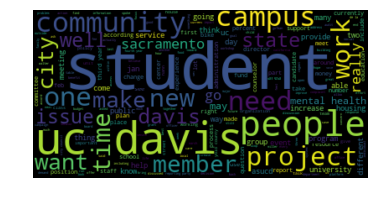

In [15]:
# the WordCloud of campus and city together
ttl = ' '.join(pd.Series(cc_text))
wordcloud1 = WordCloud().generate(ttl)
plt.figure()
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
city_text = " ".join(x.lemmatize(t) for x, t in zip(city_blob.words, city_tags))
city_blob = TextBlob(city_text)
city_blob.word_counts

city_dict = dict(city_blob.word_counts)

sorted(city_dict.items(), key=itemgetter(1), reverse=True)[:6]

[('davis', 289),
 ('city', 222),
 ('sacramento', 136),
 ('community', 105),
 ('people', 101),
 ('project', 91)]

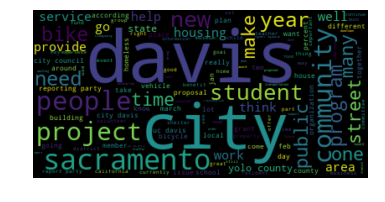

In [17]:
# the WordCloud of city

ttl = ' '.join(pd.Series(city_text))
wordcloud1 = WordCloud().generate(ttl)
plt.figure()
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
campus_text = " ".join(x.lemmatize(t) for x, t in zip(campus_blob.words, campus_tags))
campus_blob = TextBlob(campus_text)
campus_blob.word_counts

campus_dict = dict(campus_blob.word_counts)
sorted(campus_dict.items(), key=itemgetter(1), reverse=True)[:7]

[('student', 564),
 ('uc', 352),
 ('davis', 256),
 ('students', 190),
 ('health', 156),
 ('campus', 152),
 ('asucd', 147)]

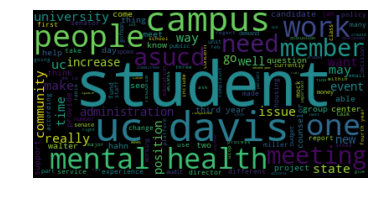

In [19]:
# the WordCloud of campus

ttl = ' '.join(pd.Series(campus_text))
wordcloud1 = WordCloud().generate(ttl)
plt.figure()
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

### What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

The first pair are " Executive ticket candidates claim biases against non-ASUCD affiliated individuals " and " Adam Hatefi and Shreya Deshpande disqualified after missing mandatory Candidate Workshop ". The correlation is 0.7261554990382968. The words they have in common are __"candidate, election, deshpande, committee, asucd"__.

The second pair are " Mental Health Town Hall erupts in protest " and " Internal audit reveals steep decline in counselors, $250,000 worth of questionably allocated funds ". The correlation is 0.7187743322867338. The words they have in common are __"student, health, counselor, mental, walter"__.

The third pair are " Second SDS administration meeting held; two administrators present " and " Students for a Democratic Society meets with chancellor to address food, housing insecurity, budget mismanagement, tuition hike ". The correlation is 0.6515697859187263. The words they have in common are __"student, meeting, uc, regent, want"__.

In [20]:
city_news_text = all_article_df[all_article_df['category'] == 'City News']['text'].tolist()
city_news =[]
for i in city_news_text:
    city_blob = TextBlob(i)
    new_text = " ".join(w.lower() for w in city_blob.words if w.lower() not in stopwords)
    city_news.append(new_text)

campus_news_text = all_article_df[all_article_df['category'] == 'Campus News']['text'].tolist()
campus_news = []
for i in campus_news_text:
    campus_blob = TextBlob(i)
    new_text = " ".join(w.lower() for w in campus_blob.words if w.lower() not in stopwords)
    campus_news.append(new_text)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer().fit_transform(campus_news_text+city_news_text)

# Use .A to display a sparse matrix.
city_campus_text = (tf_idf * tf_idf.T).A

cc_text_df = pd.DataFrame(city_campus_text)
for i in range(cc_text_df.shape[0]):
    cc_text_df.at[i, i] = 0

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [23]:
for k in ['first', 'second', 'third']:
    i,j = cc_text_df.stack().index[np.argmax(cc_text_df.values)]
    print(i,j)
    print('The',k,'pair are "',all_article_df['title'][i],
          '" and "',all_article_df['title'][j],'". The correlation is',cc_text_df.iloc[i,j])
    cc_text_df.at[i, j] = 0
    cc_text_df.at[j, i] = 0

12 24
The first pair are " Executive ticket candidates claim biases against non-ASUCD affiliated individuals " and " Adam Hatefi and Shreya Deshpande disqualified after missing mandatory Candidate Workshop ". The correlation is 0.7261554990382968
22 47
The second pair are " Mental Health Town Hall erupts in protest " and " Internal audit reveals steep decline in counselors, $250,000 worth of questionably allocated funds ". The correlation is 0.7187743322867338
1 38
The third pair are " Second SDS administration meeting held; two administrators present " and " Students for a Democratic Society meets with chancellor to address food, housing insecurity, budget mismanagement, tuition hike ". The correlation is 0.6515697859187263


In [24]:
def text_clean(string_text):
    atcl_text = string_text
    atcl_blob = TextBlob(atcl_text)
    new_text = " ".join(w.lower() for w in atcl_blob.words if w.lower() not in stopwords)
    atcl_blob = TextBlob(new_text)

    atcl_tags = [wordnet_pos(x[1]) for x in atcl_blob.pos_tags]
    atcl_text = " ".join(x.lemmatize(t) for x, t in zip(atcl_blob.words, atcl_tags))
    
    return atcl_text

In [25]:
atcl_12_text = text_clean(all_article_df['text'][12])
atcl_24_text = text_clean(all_article_df['text'][24])

docs = [atcl_12_text,atcl_24_text]

# Get word counts.
docs_df = pd.DataFrame(TextBlob(d).word_counts for d in docs).T
docs_df.sort_values(by=[0, 1], ascending=False).head()

,0,1
candidate,18.0,10.0
election,13.0,17.0
deshpande,11.0,10.0
committee,10.0,20.0
asucd,6.0,9.0


In [26]:
atcl_22_text = text_clean(all_article_df['text'][22])
atcl_47_text = text_clean(all_article_df['text'][47])

docs = [atcl_22_text,atcl_47_text]

# Get word counts.
docs_df = pd.DataFrame(TextBlob(d).word_counts for d in docs).T
docs_df = docs_df.fillna(0)
docs_df.sort_values(by=[0, 1], ascending=False).head()

,0,1
student,72.0,27.0
health,25.0,19.0
counselor,21.0,20.0
mental,21.0,17.0
walter,19.0,17.0


In [27]:
atcl_1_text = text_clean(all_article_df['text'][1])
atcl_38_text = text_clean(all_article_df['text'][38])

docs = [atcl_1_text,atcl_38_text]

# Get word counts.
docs_df = pd.DataFrame(TextBlob(d).word_counts for d in docs).T
docs_df = docs_df.fillna(0)
docs_df.sort_values(by=[0, 1], ascending=False).head()

,0,1
student,55.0,26.0
meeting,38.0,5.0
uc,21.0,20.0
regent,19.0,5.0
want,12.0,3.0


### Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Regarding to my experience at ucdavis, this corpus shows a lot of related and closed topics around my life. Refer to the campus news, topics cover 'mental health', 'community', 'member'. Refer to the city news, topics cover 'housing', 'street', 'sacramento', 'project'.

Based on the above observation, we can find that on campus, students are the most critical part, campus attaches importance on mental health problems, also community acitivies are very popular topics to be posted. At Davis City, housing is a hot topic which is very reasonable, also 'project' shows up to tell us that it is also a hotpoint citizens care about.